In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.style.use('seaborn-whitegrid')

/tmp/ipykernel_2635227/1665957966.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


In [4]:
result_dir = "experiment_results/vanilla_fix_bug_compute_loss_encodev2"
pattern = r".*"

In [7]:
df = pd.read_csv(f"{result_dir}_no_components.csv")
df.head()

,dataset,algo,use_contrastive,seed,agent_id,no_components
0,kmnist,modular,True,seed_4,agent_1,10
1,kmnist,modular,True,seed_4,agent_2,8
2,kmnist,modular,True,seed_4,agent_6,10
3,kmnist,modular,True,seed_4,agent_7,9
4,kmnist,modular,True,seed_4,agent_4,10


In [12]:
res = df.groupby(
    ["dataset", "algo", "use_contrastive"])["no_components"].mean().reset_index()
res

,dataset,algo,use_contrastive,no_components
0,fashionmnist,modular,False,7.015625
1,fashionmnist,modular,True,7.437500
2,kmnist,modular,False,8.765625
3,kmnist,modular,True,9.171875
4,mnist,modular,False,8.140625
5,mnist,modular,True,8.500000


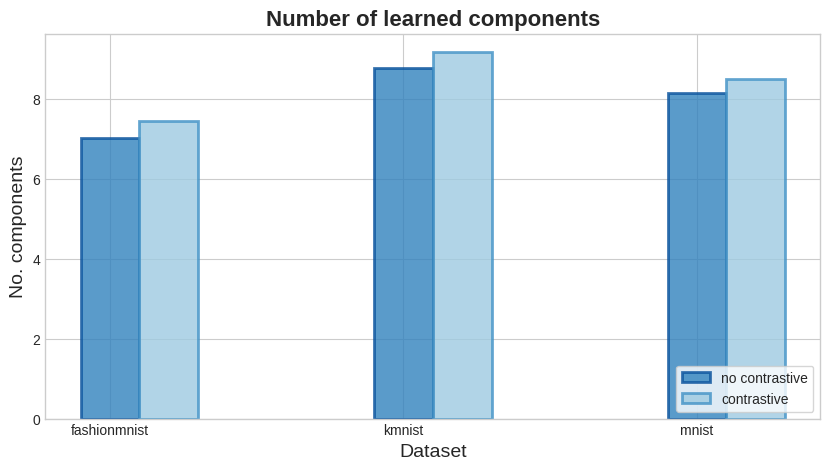

In [47]:
# create a bar plot
datasets = res["dataset"].unique()
# for each dataset, plot two bars: use_contrastive=True and use_contrastive=False
grouped = res.groupby(['dataset', 'use_contrastive'])['no_components'].mean().unstack()

fig, ax = plt.subplots(figsize=(10, 5))

colors = ['#3182bd', '#9ecae1']
edge_colors=['#08519c', '#4292c6']

bar_width = 0.2
opacity = 0.8
linewidth = 2


# Plot each group of bars
for i, (col_name, values) in enumerate(grouped.items()):
    x = np.arange(len(values))
    label = 'contrastive' if col_name else 'no contrastive'
    ax.bar(x + i * bar_width, values, bar_width, alpha=opacity, color=colors[i], linewidth=linewidth, label=label,
                           edgecolor=edge_colors[i],)


ax.set_xlabel('Dataset', fontsize=14)
ax.set_ylabel('No. components', fontsize=14)
ax.set_title('Number of learned components',fontsize=16, fontweight='bold')

ax.set_xticks(x)
ax.set_xticklabels(datasets)

ax.legend(frameon=True, loc='lower right')
plt.xticks(rotation=0);

plt.savefig(f"Figures/vanilla/no_components.pdf", bbox_inches="tight");
